In [1]:
from scipy.ndimage.interpolation import map_coordinates, affine_transform
from scipy.ndimage.filters import gaussian_filter
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import os
import matplotlib.pyplot as plt
from skimage import io
%matplotlib inline
import SimpleITK as sitk
import cv2


Using TensorFlow backend.


In [13]:
def elastic_transform(images, alpha_range=512, sigma=10, random_state=None):
    """Elastic deformation of images as described in [Simard2003]_.
    .. [Simard2003] Simard, Steinkraus and Platt, "Best Practices for
       Convolutional Neural Networks applied to Visual Document Analysis", in
       Proc. of the International Conference on Document Analysis and
       Recognition, 2003.
    """
   
    alpha = np.random.uniform(0, alpha_range)

    if random_state is None:
        random_state = np.random.RandomState(None)

    shape = images.shape
  
    dx = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma, mode="constant", cval=0) * alpha
    dy = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma, mode="constant", cval=0) * alpha

    x, y = np.meshgrid(np.arange(shape[0]), np.arange(shape[1]), indexing='ij')
    indices = np.reshape(x+dx, (-1, 1)), np.reshape(y+dy, (-1, 1))

    im = map_coordinates(images, indices, order=1).reshape(shape)

    return im


In [4]:
def draw_grid(im, grid_size):
    # Draw grid lines
    for i in range(0, im.shape[1], grid_size):
        cv2.line(im, (i, 0), (i, im.shape[0]), color=(1,))
    for j in range(0, im.shape[0], grid_size):
        cv2.line(im, (0, j), (im.shape[1], j), color=(1,))


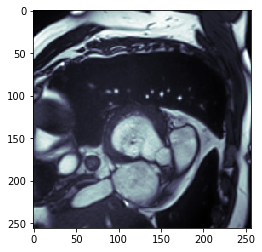

In [14]:
#Original image
image='../acdc_dicom/patient003/patient003_slice1_frame1.nii.npy'
img=np.load(image)
plt.imshow(img, cmap="bone")

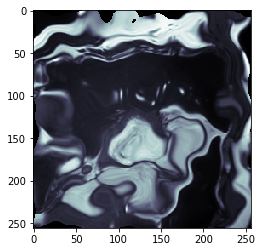

In [15]:
#distortion 1
res=elastic_transform(img,400,10)
plt.imshow(res, cmap="bone")

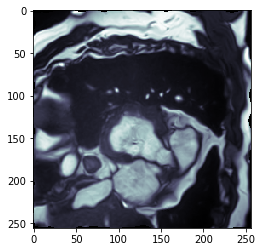

In [16]:
res1=elastic_transform(img,50,5)
plt.imshow(res1, cmap="bone")

In [17]:
np.array_equal(res,res1)

False

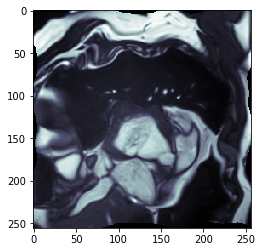

In [18]:
res1=elastic_transform(img,300,10)
plt.imshow(res1, cmap="bone")

### Through keras

In [19]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [20]:
#converting to 3d; using Ehab's code
ds = img
finalArray = np.zeros((img.shape[0], img.shape[1], 3))
for index in range(3):
    finalArray[:, :, index] = ds

In [21]:
x=finalArray

In [22]:
x = x.reshape((1,) + x.shape)

In [23]:
x.shape

(1, 256, 256, 3)

In [25]:
i = 0
for batch in datagen.flow(x, batch_size=1, save_to_dir='../Notebooks/preview', save_prefix='test', save_format='jpeg'):   
    i += 1
    if i > 20:
        break 

In [26]:
#still working
xbatch=datagen.flow(x,batch_size=9)
xbatch.batch_size
i=0
for j in xbatch:
    #plt.imshow(j, cmap="bone")
    print(j.shape)
    i +=1
    if i>10:
        break
